In [ ]:
pip install -q mahotas

     |████████████████████████████████| 1.5MB 2.8MB/s 


In [ ]:
!pip install flask==0.12.2

     |████████████████████████████████| 92kB 2.3MB/s 
  Found existing installation: Flask 1.1.2
    Uninstalling Flask-1.1.2:
      Successfully uninstalled Flask-1.1.2


In [ ]:
!pip install flask-ngrok

In [ ]:
pip install joblib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import mahotas
import cv2
import os
import h5py

images_per_class = 15
fixed_size       = tuple((500, 500))
train_path       = "/content/drive/My Drive/image-classification-python-master/dataset/train"
h5_data          = '/content/drive/My Drive/image-classification-python-master/output/data.h5'
h5_labels        = '/content/drive/My Drive/image-classification-python-master/output/labels.h5'
bins             = 8

In [ ]:

def fd_hu_moments(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    feature = cv2.HuMoments(cv2.moments(image)).flatten()
    return feature

In [ ]:

def fd_haralick(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    haralick = mahotas.features.haralick(gray).mean(axis=0)
    return haralick

In [ ]:

def fd_histogram(image, mask=None):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist  = cv2.calcHist([image], [0, 1, 2], None, [bins, bins, bins], [0, 256, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

In [ ]:
train_labels = os.listdir(train_path)

train_labels.sort()
print(train_labels)

global_features = []
labels          = []

['acer_campestre', 'acer_ginnala', 'acer_griseum', 'acer_palmatum', 'acer_pensylvanicum', 'acer_platanoides', 'acer_pseudoplatanus', 'acer_rubrum', 'acer_saccharinum', 'acer_saccharum', 'aesculus_flava', 'aesculus_glabra', 'aesculus_hippocastamon', 'amelanchier_arborea', 'amelanchier_canadensis', 'amelanchier_laevis', 'asimina_triloba', 'betula_alleghaniensis', 'betula_jacqemontii', 'betula_nigra', 'betula_populifolia', 'broussonettia_papyrifera', 'carpinus_betulus', 'carpinus_caroliniana', 'carya_glabra', 'carya_tomentosa', 'castanea_dentata', 'catalpa_bignonioides', 'catalpa_speciosa', 'celtis_occidentalis', 'celtis_tenuifolia', 'cercidiphyllum_japonicum', 'cercis_canadensis', 'chionanthus_retusus', 'chionanthus_virginicus', 'cornus_florida', 'cornus_kousa', 'cornus_mas', 'corylus_colurna', 'crataegus_crus-galli', 'crataegus_laevigata', 'crataegus_phaenopyrum', 'crataegus_pruinosa', 'crataegus_viridis', 'diospyros_virginiana', 'eucommia_ulmoides', 'evodia_daniellii', 'fagus_grandifol

In [ ]:
for training_name in train_labels:
    dir = os.path.join(train_path, training_name)

    current_label = training_name

    for x in range(1,images_per_class+1):
        file = dir + "/" + str(x) + ".jpg"

        image = cv2.imread(file)
        image = cv2.resize(image, fixed_size)

        fv_hu_moments = fd_hu_moments(image)
        fv_haralick   = fd_haralick(image)
        fv_histogram  = fd_histogram(image)
      
        global_feature = np.hstack([fv_histogram, fv_haralick, fv_hu_moments])
        labels.append(current_label)
        global_features.append(global_feature)

    print("[STATUS] processed folder: {}".format(current_label))

print("[STATUS] completed Global Feature Extraction...")

[STATUS] processed folder: acer_campestre
[STATUS] processed folder: acer_ginnala
[STATUS] processed folder: acer_griseum
[STATUS] processed folder: acer_palmatum
[STATUS] processed folder: acer_pensylvanicum
[STATUS] processed folder: acer_platanoides
[STATUS] processed folder: acer_pseudoplatanus
[STATUS] processed folder: acer_rubrum
[STATUS] processed folder: acer_saccharinum
[STATUS] processed folder: acer_saccharum
[STATUS] processed folder: aesculus_flava
[STATUS] processed folder: aesculus_glabra
[STATUS] processed folder: aesculus_hippocastamon
[STATUS] processed folder: amelanchier_arborea
[STATUS] processed folder: amelanchier_canadensis
[STATUS] processed folder: amelanchier_laevis
[STATUS] processed folder: asimina_triloba
[STATUS] processed folder: betula_alleghaniensis
[STATUS] processed folder: betula_jacqemontii
[STATUS] processed folder: betula_nigra
[STATUS] processed folder: betula_populifolia
[STATUS] processed folder: broussonettia_papyrifera
[STATUS] processed fo

In [ ]:
print("[STATUS] feature vector size {}".format(np.array(global_features).shape))

print("[STATUS] training Labels {}".format(np.array(labels).shape))

targetNames = np.unique(labels)
le          = LabelEncoder()
target      = le.fit_transform(labels)
print("[STATUS] training labels encoded...")
scaler            = MinMaxScaler(feature_range=(0, 1))
rescaled_features = scaler.fit_transform(global_features)
print("[STATUS] feature vector normalized...")
print("[STATUS] target labels: {}".format(target))
print("[STATUS] target labels shape: {}".format(target.shape))

h5f_data = h5py.File(h5_data, 'w')
h5f_data.create_dataset('dataset_1', data=np.array(rescaled_features))

h5f_label = h5py.File(h5_labels, 'w')
h5f_label.create_dataset('dataset_1', data=np.array(target))

h5f_data.close()
h5f_label.close()

print("[STATUS] end of training..")

[STATUS] feature vector size (1695, 532)
[STATUS] training Labels (1695,)
[STATUS] training labels encoded...
[STATUS] feature vector normalized...
[STATUS] target labels: [  0   0   0 ... 112 112 112]
[STATUS] target labels shape: (1695,)
[STATUS] end of training..


In [ ]:
import h5py
import numpy as np
import os
import glob
import cv2
import warnings
from matplotlib import pyplot
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.externals import joblib

warnings.filterwarnings('ignore')

fixed_size = tuple((500, 500))
num_trees = 100
test_size = 0.10
seed      = 9
train_path = "/content/drive/My Drive/image-classification-python-master/dataset/train"
test_path  = "/content/drive/My Drive/image-classification-python-master/dataset/test"
info_path  = "/content/drive/My Drive/image-classification-python-master/dataset/info"
h5_data    = '/content/drive/My Drive/image-classification-python-master/output/data.h5'
h5_labels  = '/content/drive/My Drive/image-classification-python-master/output/labels.h5'
scoring    = "accuracy"

train_labels = os.listdir(train_path)

train_labels.sort()

if not os.path.exists(test_path):
    os.makedirs(test_path)

models = []
models.append(('LR', LogisticRegression(random_state=seed)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state=seed)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, random_state=seed)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(random_state=seed)))

results = []
names   = []

h5f_data  = h5py.File(h5_data, 'r')
h5f_label = h5py.File(h5_labels, 'r')

global_features_string = h5f_data['dataset_1']
global_labels_string   = h5f_label['dataset_1']

global_features = np.array(global_features_string)
global_labels   = np.array(global_labels_string)

h5f_data.close()
h5f_label.close()

print("[STATUS] features shape: {}".format(global_features.shape))
print("[STATUS] labels shape: {}".format(global_labels.shape))

print("[STATUS] training started...")

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


[STATUS] features shape: (1695, 532)
[STATUS] labels shape: (1695,)
[STATUS] training started...


In [ ]:
(trainDataGlobal, testDataGlobal, trainLabelsGlobal, testLabelsGlobal) = train_test_split(np.array(global_features),
                                                                                          np.array(global_labels),
                                                                                          test_size=test_size,
                                                                                          random_state=seed)

print("[STATUS] splitted train and test data...")
print("Train data  : {}".format(trainDataGlobal.shape))
print("Test data   : {}".format(testDataGlobal.shape))
print("Train labels: {}".format(trainLabelsGlobal.shape))
print("Test labels : {}".format(testLabelsGlobal.shape))

[STATUS] splitted train and test data...
Train data  : (1525, 532)
Test data   : (170, 532)
Train labels: (1525,)
Test labels : (170,)


LR: 0.390815 (0.038616)
LDA: 0.405895 (0.028489)
KNN: 0.388837 (0.047284)
CART: 0.332430 (0.043409)
RF: 0.647149 (0.038209)
NB: 0.382951 (0.034379)
SVM: 0.232129 (0.034429)


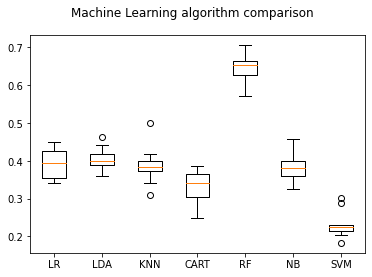

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, trainDataGlobal, trainLabelsGlobal, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

fig = pyplot.figure()
fig.suptitle('Machine Learning algorithm comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()



In [ ]:
rfc = RandomForestClassifier(n_estimators=600, max_depth=300, max_features='sqrt')
rfc.fit(trainDataGlobal,trainLabelsGlobal)
# predictions
rfc_predict = rfc.predict(testDataGlobal)
print("=== Confusion Matrix ===")
print(confusion_matrix(testLabelsGlobal, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(testLabelsGlobal, rfc_predict))
print('\n')

=== Confusion Matrix ===
[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 1 ... 0 0 1]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.00      0.00      0.00         0
           2       0.33      1.00      0.50         1
           3       1.00      1.00      1.00         1
           4       0.50      0.50      0.50         2
           5       1.00      0.50      0.67         2
           6       1.00      1.00      1.00         1
           7       0.00      0.00      0.00         2
           8       1.00      0.50      0.67         2
           9       0.75      1.00      0.86         3
          10       0.00      0.00      0.00         1
          11       0.50      1.00      0.67         1
          12       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         1
          15

In [ ]:
import matplotlib.pyplot as plt
import cv2
def classify():
  clf  = RandomForestClassifier(n_estimators=num_trees, random_state=seed)
  test_path  = "/content/drive/My Drive/image-classification-python-master/dataset/test"
  clf.fit(trainDataGlobal, trainLabelsGlobal)
  clf_pred = clf.predict(trainDataGlobal)
  for file in glob.glob(test_path + "/*.jpg"):
    image = cv2.imread(file)
    info_path  = "/content/drive/My Drive/image-classification-python-master/dataset/info"
    image = cv2.resize(image, fixed_size)
  
    fv_hu_moments = fd_hu_moments(image)
    fv_haralick   = fd_haralick(image)
    fv_histogram  = fd_histogram(image)
    global_feature = np.hstack([fv_histogram, fv_haralick, fv_hu_moments])
    
    scaler            = MinMaxScaler(feature_range=(0, 1))
    rescaled_features = scaler.fit_transform(global_features)
    prediction = clf.predict(global_feature.reshape(1,-1))[0]
    main=train_labels[prediction]
    
    #cv2.putText(image, train_labels[prediction], (20,30), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0,0,0), 3)
    #info_path=info_path+"/"+train_labels[prediction]+".txt"
    #plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    #f1=open(info_path)
    #f=f1.read()
    #print(f)
    #plt.show()
    return(main)
    

In [ ]:
def info(name):
  info_path  = "/content/drive/My Drive/image-classification-python-master/dataset/info"
  info_path=info_path+"/"+name+".txt"
  f1=open(info_path)
  f=f1.read()
  return(f)

In [ ]:
%mkdir templates -p

In [ ]:
%%writefile templates/index.html
<body>
<div id="cont">
  <h1>Medleaf Detection</h1>
  </div> 
<form method="POST" action="upload_google"  enctype="multipart/form-data">
  <input type="file" name="image" id="image" required="required" multiple="multiple">
  <p>Click in this area to Select Image.</p>
  <button type="submit">Upload Image</button>
 
</form>
</body>

<link rel="stylesheet"
      href="{{url_for('.static', filename='styles1.css')}}">

Writing templates/index.html


In [ ]:
%mkdir static -p

In [ ]:
%%writefile static/styles1.css
body{
  background: rgba(0,0,0,0.9);
}
form{
  position: absolute;
  top: 50%;
  left: 50%;
  margin-left: -250px;
  width: 500px;
  height: 200px;
  
}

h1 {
 font-size: 74px;
 line-height: 140px;
 font-family: Lucida, sans-serif;
 font-weight: bold;
 text-align: center;
 color:#ffffff;
}
 
#cont {
 /*stitching*/
 outline: 1px dashed #98abb9;
 outline-offset: -5px;
 
 background-color: #556068;
 height: 150px;
 width: 800px;
 margin: 70px auto;
  
 /*shadow*/
 -webkit-box-shadow: 2px 2px 2px #000;
 -moz-box-shadow: 2px 2px 2px #000;
 box-shadow: 2px 2px 2px #000;
}
form p{
  width: 100%;
  height: 100%;
  text-align: center;
  line-height: 170px;
  color: #ffffff;
  font-family: Arial;
  border: 4px dashed #fff;
}
form input{
  position: absolute;
  margin: 0;
  padding: 0;
  width: 100%;
  height: 100%;
  outline: none;
  opacity: 0;
  
}
form button{
  margin: 0;
  color: #fff;
  background: #16a085;
  border: none;
  width: 508px;
  height: 35px;
  margin-top: 20px;
  margin-left: -4px;
  border-radius: 4px;
  border-bottom: 4px solid #117A60;
  transition: all .2s ease;
  outline: none;
}
form button:hover{
  background: #149174;
	color: #0C5645;
}
form button:active{
  border:0;
}


Writing static/styles1.css


In [ ]:
%%writefile static/styles.css
body{
  background: rgba(0,0,0,0.9);
}
h1 {
 font-size: 74px;
 line-height: 140px;
 font-family: Lucida, sans-serif;
 font-weight: bold;
 text-align: center;
 color:#ffffff;
}
 
#cont {
 /*stitching*/
 outline: 1px dashed #98abb9;
 outline-offset: -5px;
 
 background-color: #556068;
 height: 150px;
 width: 800px;
 margin: 70px auto;
  
 /*shadow*/
 -webkit-box-shadow: 2px 2px 2px #000;
 -moz-box-shadow: 2px 2px 2px #000;
 box-shadow: 2px 2px 2px #000;
}
p{
  width: 60%;
  height: auto;
  padding-right:200px;
  text-align: center;
  line-height: 50px;
  color: #ffffff;
  font-family: Arial;
  border: 2px dashed #fff;
  margin-left: 150px;
}
pre{
  width: 60%;
  height: auto;
  padding-left:50px;
  padding-top:20px;
  padding-bottom:20px;
  padding-right:200px;
  line-height: 15px;
  color: #ffffff;
  font-family: Arial;
  border: 2px dashed #fff;
  margin-left: 150px;
}


Writing static/styles.css


In [ ]:
%%writefile templates/upload.html
<body>
  <div id="cont">
  <h1>Medleaf Detection</h1>
  </div> 
  <p> The name of the species is <strong>{{name}}</strong></p>
  <pre>Description is</br>
      {{des}}</pre>
  
</body>

<link rel="stylesheet"
      href="{{url_for('.static', filename='styles.css')}}">

Writing templates/upload.html


In [ ]:

from flask import Flask
from flask_ngrok import run_with_ngrok
from flask import Flask,render_template,url_for,request,redirect
import os
import cv2
app = Flask(__name__)
run_with_ngrok(app)  # Start ngrok when app is run

@app.route('/')
def index():
	return render_template('index.html')
 
app.config["IMAGE_UPLOADS"]="/content/drive/My Drive/image-classification-python-master/dataset/test"
 
@app.route('/upload_google', methods=['GET','POST'])
def upload_google():
    if request.method =='POST':
      if request.files:
        name=""
        image = request.files['image']
        image.save(os.path.join(app.config["IMAGE_UPLOADS"], image.filename))
        print("image saved")
        result=classify()
        information=info(result)
        if(len(result)>16):
          name="NOT AVAILABLE IN THE DATASET"
          des="NOT AVAILABLE"
        else:
          name=result
          des=information  
        
        return render_template('upload.html', name=name,des=des) 

if __name__ == '__main__':
    app.run()

 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://35cf860472f2.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [30/May/2020 12:07:08] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [30/May/2020 12:07:09] "GET /static/styles1.css HTTP/1.1" 200 -
127.0.0.1 - - [30/May/2020 12:07:09] "GET /favicon.ico HTTP/1.1" 404 -


image saved


127.0.0.1 - - [30/May/2020 12:25:06] "POST /upload_google HTTP/1.1" 200 -
127.0.0.1 - - [30/May/2020 12:25:07] "GET /static/styles.css HTTP/1.1" 200 -


image saved


127.0.0.1 - - [30/May/2020 12:26:38] "POST /upload_google HTTP/1.1" 200 -


image saved


127.0.0.1 - - [30/May/2020 12:27:00] "POST /upload_google HTTP/1.1" 200 -


image saved


127.0.0.1 - - [30/May/2020 12:28:15] "POST /upload_google HTTP/1.1" 200 -
